# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Linear Congruential Generators, and Pseudo-Random Numbers

## What's this all about?

### Question: 

How can we produce realisations from Uniform$(0,1)$, the **fundamental random variable**?

i.e., how can we produce samples $(x_1, x_2, \ldots, x_n)$ from $X_1, X_2, \ldots, X_n$ $\overset{IID}{\thicksim}$ Uniform$(0,1)$?

What is python doing when we ask for `random()`?

In [1]:
from random import random as rnd
rnd()

0.5840715404675095

### Answer:

Modular arithmetic and number theory gives us pseudo-random number generators.

 

### Question:

What can we do with samples from a Uniform$(0,1)$ RV?  Why bother?

### Answer:

We can use them to sample or simulate from other, more complex, random variables.  These simulations can be used to understand real-world phenomenon such as:

- modelling traffic queues on land, air or sea for supply chain management
- estimate missing data in a statistical survey to better manage or administer
- helping a hospital to manage critical care for pre-term babies
- helping [NZ's Department of Conservation](https://www.doc.govt.nz/) to minimise the extinction probability of various marine organisms
- helping the [Swedish Agency for Marine and Water Management](https://www.havochvatten.se/en/start.html) towards [sustainable consumption of its red-listed](https://en.wikipedia.org/wiki/Eel#Sustainable_consumption) [Eel](https://en.wikipedia.org/wiki/Brantevik_Eel) populations
- help the Government find if certain fishing boats are illegally under-reporting their catches from its nation's waters
- find cheaper air tickets for a vacation
- make money in the stock market
- etc., etc.
- various physical systems can be modeled. See http://en.wikipedia.org/wiki/Monte_Carlo_method for a bigger picture.

See how the modern history of *Monte Carlo Methods* starts in Los Alamos!

In [3]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht)
showURL('https://en.wikipedia.org/wiki/Monte_Carlo_method',600)

**Remark:** When **mathematical models become too complicated** to explain a complex phenomenon of interest (eg. traffic or supply-chain management, predictive maintenance of an expensive component in a national grid/system of power plant, etc.), you have little choice but to resort to **modular arithmetic based simulations with pseudo-random numbers**. 

[John von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) invented such a pseudo-random number generator called the [middle-square method](https://en.wikipedia.org/wiki/Middle-square_method#History) for solving complex problems in the [Manhattan Project](https://en.wikipedia.org/wiki/Manhattan_Project). 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/JohnvonNeumann-LosAlamos.gif/330px-JohnvonNeumann-LosAlamos.gif)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Trinity_shot_color.jpg/330px-Trinity_shot_color.jpg)

Finally, statistical inference methods you are about to see can be combined with simulation to conduct **simulation-intensive statistical inference**! These are called Monte Carlo methods and the naming has an interesting folk-tale from Los Alamos.

## Linear Congruential Generators

A linear congruential generator (LCG) is a simple *pseudo-random number generator (PRNG)* - a simple way of imitating samples or realizations from the Uniform$(0,1)$.  

"Pseudo-random" means that the numbers are not really random [From Ancient Greek pseudo means “false, lying”)].

We will look at what we mean by that as we find out about linear congruential generators. 

The theory behind LCGs is easy to understand, and they are easily implemented and fast.

To make a LCG we need:

- a modulus $m$ ($m > 0$)
- an integer multiplier $a$ ($0 \le a < m$)
- an integer increment $c$ ($0 \le c < m$)
- an integer seed $x_0$ ($0 \le x_0 < m$)
- an integer sequence length $n$

Using these inputs, the LCG generates numbers $x_1, x_2, \ldots x_{n-1} $ where $x_{i+1}$ is calculated from $x_i$ as defined by the following recurrence relation:

$$x_{i+1} \gets mod \left(a x_i + c , m \right)$$

In the above expression $\gets$ denotes "gets" as in variable assignment.

$x_0,x_1,\ldots,x_{n-1}$ is the sequence of pseudo-random numbers called the linear congruential sequence.



We can define a function parameterised by $(m,a,c,x_0,n)$ to give us a linear congruential sequence in the form of a list. 

(Remember about function parameters?  The function **parameters** here are `m`, `a`, `c`, `x0`, and `n`.  Note that the **return value** of the function is a list.  

### Implementing the LCG

Let's see how we can define a function for our LCG next.'

In [2]:
def linConGen(m, a, b, x0, n):
    '''A linear congruential sequence generator.
    
    Param m is the integer modulus to use in the generator.
    Param a is the integer multiplier.
    Param b is the integer increment.
    Param x0 is the integer seed.
    Param n is the integer number of desired pseudo-random numbers.
    
    Returns a list of n pseudo-random integer modulo m numbers.'''
    
    x = x0 # the seed
    retValue = [x % m]  # start the list with x=x0
    for i in range(2, n+1, 1):
        x = (a * x + b) % m # the generator, using modular arithmetic
        retValue.append(x) # append the new x to the list
    return retValue

In [3]:
linConGen(10,1,3,1,5)

[1, 4, 7, 0, 3]

You know enough Python to understand what every line in the above function `linConGen` is doing!

The function is merely implementing the pseudocode or algorithm of the linear congruential generator using a for-loop and modular arithmetic:  note that the generator produces integers modulo $m$.

### Linear Congruential Generators:  the Good, the Bad, and the Ugly

Are all linear congruential generators as good as each other?  What makes a good LCG?

One desirable property of a LCG is to have the longest possible period.   

The **period** is the length of sequence we can get before we get a repeat.  The longest possible period a LCG can have is $m$.  Lets look at an example.  

In [4]:
# first assign values to some variables to pass as arguments to the function
m  = 17  # set modulus to 17
a  = 2   # set multiplier to 2
b  = 7   # set increment to 7
x0 = 1   # set seed to 1
n  = 18  # set length of sequence to 18 = 1 + maximal period 
L1 = linConGen(m, a, b, x0, n) # use our linConGren function to make the sequence
L1                    # this sequence repeats itself with period 8

[1, 9, 8, 6, 2, 11, 12, 14, 1, 9, 8, 6, 2, 11, 12, 14, 1, 9]

You should be able to see the repeating pattern `1, 9, 8, 6, 2, 11, 12, 14`.  If you can't you can see that the sequence actually contains 8 unique numbers by making a set out of it:

In [6]:
set(L1)

{1, 2, 6, 8, 9, 11, 12, 14}

Changing the seed $x_0$ will, at best, make the sequence repeat itself over other numbers but with the same period:

In [7]:
x0 = 3             # leave m, a, b as it is but just change the seed from 1 to 3 here
L2 = linConGen(m, a, b, x0, n)
L2                 # changing the seed makes this sequence repeat itself over other numbers but also with period 8

[3, 13, 16, 5, 0, 7, 4, 15, 3, 13, 16, 5, 0, 7, 4, 15, 3, 13]

In [8]:
set(L2)

{0, 3, 4, 5, 7, 13, 15, 16}

At worst, a different `seed` specified by `x0` might make the sequence get stuck immediately:

In [9]:
x0 = 10            # leave m, a, c as it is but just change the seed to 10
L3 = linConGen(m, a, b, x0, n)
L3

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [10]:
set(L3)

{10}

An LCG is just a discrete determinstic dynamical system and each seed acts as the initial condition with different behaviours. The behaviour above can be seen as a *fixed point* at 10 for this LCG initialized at 10.

In [11]:
set(L3).union(set(L2)).union(set(L1))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

Thus, the three sequences with different initial conditions or seeds cover all the points in our **Ring of integers modulo 17**.

What about changing the multiplier $a$?

In [12]:
m  = 17 # same as before
a  = 3  # change the multiplier from 2 to 3 here
b  = 7  # same as before
x0 = 1  # set seed at 1 
n  = 18 # set length of sequence to 18 = 1 + maximal period
L4 = linConGen(m, a, b, x0, n)
L4

[1, 10, 3, 16, 4, 2, 13, 12, 9, 0, 7, 11, 6, 8, 14, 15, 1, 10]

In [13]:
set(L4)

{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [14]:
x0 = 5  # just change the seed to 5
linConGen(m, a, b, x0, n)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

We want an LCG with a **full period** of $m$ so that we can use it with any seed and not get stuck at fixed points or short periodic sequences. This is a minimal requirement for simulation purposes that we will employ such sequences for.  Is there anyway to know what makes a LCG with a full period?  

It turns out that an LCG will have a full period if and only if:

- $b$ and $m$ are relatively prime or coprime.  i.e. the **greatest common divisor (gcd)** of $b$ and $m$ is $1$; and
- $a-1$ is divisible by all **prime factors** of $m$; and
- $a-1$ is a multiple of 4 if $m$ is a multiple of 4.

(Different conditions apply when $c=0$.  The Proposition and Proof for this are in Knuth, The Art of Computer Programming, vol. 2, section 3.3).

Python has a function `gcd` which can calculate the greatest common divisor of two numbers:

In [15]:
m = 2**8

In [16]:
from math import gcd
b = 101
gcd(101,m)

1

In [17]:
from sympy.ntheory import primefactors as prime_factors
prime_factors(m)

[2]

In [18]:
k=5
a = k*4+1

In [19]:
prime_factors(a-1)

[2, 5]

In [20]:
(a-1) % 4

0

In [21]:
ourLCG = linConGen(m,a,b,1,256+1)
len(set(ourLCG))

256

Python can also help us to calculate **prime factors** with the `prime_factors` function:

In [22]:
from sympy.ntheory import primefactors as prime_factors

In [23]:
prime_factors(m)

[2]

In [24]:
prime_factors(7634887623876428376482746)

[2, 25504980841, 149674443424853]

$(m, a, c, x0, n) = (256, 137, 123, 13, 256)$ gives a linear congruential sequence with the longest possible period of 256.  Let us see how these parameters satisfy the above three requirements while those earlier with $m=17$, $a=2$, and $c=7$ do not.

In [25]:
(m,a,c,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters

In [26]:
gcd(c,m)         # checking if the greatest common divisor of c and m is indeed 1

1

In [27]:
prime_factors(m)   # it is easy to get a list of all the prime factors of m

[2]

In [28]:
(a-1) % 2             # checking if a-1=136 is divisible by 2, the only prime factors of m

0

In [29]:
[ (a-1)%x for x in prime_factors(m) ]  
# a list comprehension check for an m with more prime factors

[0]

In [30]:
m % 4         # m is a multiple of 4 check

0

In [31]:
(a-1) % 4       # if m is a multiple of 4 then a-1 is also a multiple of 4

0

In [32]:
(m, a, c, x0, n)  # therefore these parameter values satisfy all conditions to have maximum period length m

(256, 137, 123, 13, 256)

Thus, the parameters $(m,  a,  c,  x_0,  n) = (256, 137, 123, 13, 256)$  do indeed satisfy the three conditions to guarantee the longest possible period of 256.  

In contrast, for the LCG example earlier with $m=17$, $a=2$, and $c=7$, although $m$ and $c$ are relatively prime, i.e., $gcd(m,c)=1$, we have the violation that $a-1=2-1=1$ is not divisible by the only prime factor $17$ of $m=17$.  Thus, we cannot get a period of maximal length $17$ in that example.

In [33]:
[ (2-1)%x for x in prime_factors(17) ]

[1]

Let us see if the parameters $(m, a, c, x_0, n) = (256, 137, 123, 13, 256)$  that satisfy the three conditions to guarantee the longest possible period of 256 do indeed produce such a sequence:

In [34]:
(m,a,b,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters
ourLcg = linConGen(m,a,b,x0,n)
print(ourLcg)

[13, 112, 107, 190, 41, 108, 71, 122, 197, 232, 163, 182, 225, 228, 127, 114, 125, 96, 219, 174, 153, 92, 183, 106, 53, 216, 19, 166, 81, 212, 239, 98, 237, 80, 75, 158, 9, 76, 39, 90, 165, 200, 131, 150, 193, 196, 95, 82, 93, 64, 187, 142, 121, 60, 151, 74, 21, 184, 243, 134, 49, 180, 207, 66, 205, 48, 43, 126, 233, 44, 7, 58, 133, 168, 99, 118, 161, 164, 63, 50, 61, 32, 155, 110, 89, 28, 119, 42, 245, 152, 211, 102, 17, 148, 175, 34, 173, 16, 11, 94, 201, 12, 231, 26, 101, 136, 67, 86, 129, 132, 31, 18, 29, 0, 123, 78, 57, 252, 87, 10, 213, 120, 179, 70, 241, 116, 143, 2, 141, 240, 235, 62, 169, 236, 199, 250, 69, 104, 35, 54, 97, 100, 255, 242, 253, 224, 91, 46, 25, 220, 55, 234, 181, 88, 147, 38, 209, 84, 111, 226, 109, 208, 203, 30, 137, 204, 167, 218, 37, 72, 3, 22, 65, 68, 223, 210, 221, 192, 59, 14, 249, 188, 23, 202, 149, 56, 115, 6, 177, 52, 79, 194, 77, 176, 171, 254, 105, 172, 135, 186, 5, 40, 227, 246, 33, 36, 191, 178, 189, 160, 27, 238, 217, 156, 247, 170, 117, 24, 83, 2

In [35]:
S = set(ourLcg)  # sort it in a set to see if it indeed has maximal period of 256
print(len(S))

256


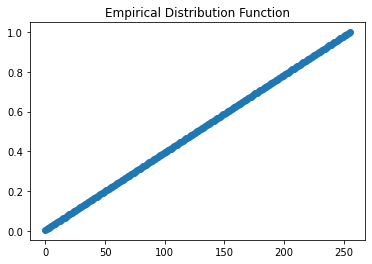

In [36]:
sample = linConGen(m,a,b,x0,256*10)
from Utils import makeEDF
from Utils import plotEDF
plotEDF(makeEDF(sample))

This looks pretty good, it seems to verify that it is indeed a pseudorandom sequence. Lets try to take this modulo $K$, where $M$ is divisible by $K$. For us, $M = 256$ so we can take for instance $K = 8$. Lets see what happens

In [37]:
from math import floor

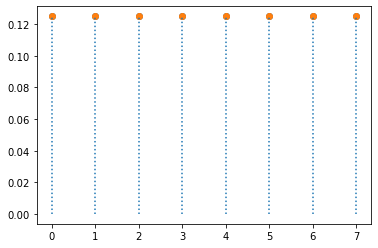

In [38]:
sample_8 = [floor((s / (256))*8) for s in sample]
from Utils import plotEMF, makeEMF
plotEMF(makeEMF(sample_8))

It still retains the pseudo-randomness, but what is the period of the sequence `sample_8`?

In [39]:
for period in range(2,300):
    found = True
    for i in range(period):
        if (sample_8[i] != sample_8[i+period]):
            found = False
            break
    if found == True:
        print(period)
        break

256


In [40]:
print(sample_8)

[0, 3, 3, 5, 1, 3, 2, 3, 6, 7, 5, 5, 7, 7, 3, 3, 3, 3, 6, 5, 4, 2, 5, 3, 1, 6, 0, 5, 2, 6, 7, 3, 7, 2, 2, 4, 0, 2, 1, 2, 5, 6, 4, 4, 6, 6, 2, 2, 2, 2, 5, 4, 3, 1, 4, 2, 0, 5, 7, 4, 1, 5, 6, 2, 6, 1, 1, 3, 7, 1, 0, 1, 4, 5, 3, 3, 5, 5, 1, 1, 1, 1, 4, 3, 2, 0, 3, 1, 7, 4, 6, 3, 0, 4, 5, 1, 5, 0, 0, 2, 6, 0, 7, 0, 3, 4, 2, 2, 4, 4, 0, 0, 0, 0, 3, 2, 1, 7, 2, 0, 6, 3, 5, 2, 7, 3, 4, 0, 4, 7, 7, 1, 5, 7, 6, 7, 2, 3, 1, 1, 3, 3, 7, 7, 7, 7, 2, 1, 0, 6, 1, 7, 5, 2, 4, 1, 6, 2, 3, 7, 3, 6, 6, 0, 4, 6, 5, 6, 1, 2, 0, 0, 2, 2, 6, 6, 6, 6, 1, 0, 7, 5, 0, 6, 4, 1, 3, 0, 5, 1, 2, 6, 2, 5, 5, 7, 3, 5, 4, 5, 0, 1, 7, 7, 1, 1, 5, 5, 5, 5, 0, 7, 6, 4, 7, 5, 3, 0, 2, 7, 4, 0, 1, 5, 1, 4, 4, 6, 2, 4, 3, 4, 7, 0, 6, 6, 0, 0, 4, 4, 4, 4, 7, 6, 5, 3, 6, 4, 2, 7, 1, 6, 3, 7, 0, 4, 0, 3, 3, 5, 1, 3, 2, 3, 6, 7, 5, 5, 7, 7, 3, 3, 3, 3, 6, 5, 4, 2, 5, 3, 1, 6, 0, 5, 2, 6, 7, 3, 7, 2, 2, 4, 0, 2, 1, 2, 5, 6, 4, 4, 6, 6, 2, 2, 2, 2, 5, 4, 3, 1, 4, 2, 0, 5, 7, 4, 1, 5, 6, 2, 6, 1, 1, 3, 7, 1, 0, 1, 4, 5, 3, 3, 5, 

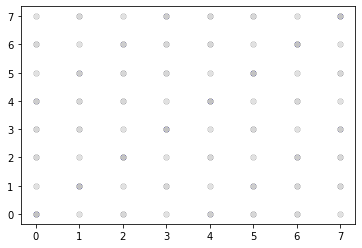

In [41]:
from matplotlib import pyplot as plt
plt.scatter(sample_8[:-1],sample_8[1:],alpha=0.005) 

ourLcg is an example of a **good** LCG to some extent, but the plot above tells us that there is some issues. 

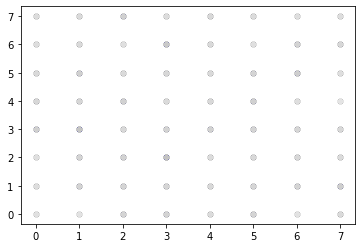

In [42]:
from random import randint
sample_8_python = [randint(0,7) for i in range(256*10)]
plt.scatter(sample_8_python[:-1],sample_8_python[1:],alpha=0.005)

The next example will demonstrate what can go wrong if our $m,a,b$ is not so good.

Consider $m= 256$, $a = 136$, $b = 3$, $x_0 = 0$, $n = 15$. 

In [43]:
m,a,c,x0,n = 256, 136, 3, 0, 15
gcd(m,c)

1

In [44]:
prime_factors(m)

[2]

But, since $a-1=135$ is not divisible by 2, the only prime factor of $m=256$, we get into the fixed point 91 no matter where we start from.  

### YouTry 

See if changing the seed $x_0$ makes a difference?

In [45]:
linConGen(m, a, c, x0, n)

[0, 3, 155, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91]

We can look at the linear congruential sequence generated by $(m,a,c,x_0,n)=(256,137,0,123,256)$ from Knuth's classic [The Art of Computer Programming, vol. 2, Sec. 3.3.4, Table 1, Line 5] and compare it with `ourLcg`.

In [46]:
m, a, c, x0, n = 256, 137, 0, 123, 256
lcgKnuth334T1L5 = linConGen(m, a, c, x0, n)
print(lcgKnuth334T1L5)

[123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43,

In [47]:
print(set(lcgKnuth334T1L5))

{131, 3, 139, 11, 147, 19, 27, 155, 163, 35, 171, 43, 179, 51, 59, 187, 195, 67, 203, 75, 211, 83, 91, 219, 99, 227, 235, 107, 251, 115, 243, 123}


Note that although `ourLcg` has maximal period of 256,  `lcgKnuth334T1L5` has period of  32.  Let us look at them as  points.

We can plot each number in the sequence, say `ourLcg`, against its index in the sequence -- i.e. plot the first number 13 against 0 as the tuple (0, 13), the second number against 1 as the tuple (1, 112), etc.   

To do this, we need to make a list of the index values, which is simple using `range(256)` which as you know will give us a list of numbers from 0 to 255 going up in steps of 1.   Then we can `zip` this list with the sequence itself to make the `list` of the desired `tuples`.

Then we plot using `points` for `ourLcg` and for `lcgKnuth334T1L5`.

In [ ]:
#?text

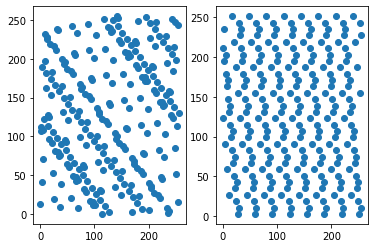

In [48]:
fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].scatter(range(len(ourLcg)),ourLcg)
ax[1].scatter(range(len(ourLcg)),lcgKnuth334T1L5)

We can see that in section 3.3.4, Table 1, line 5 in The Art of Computer Programming, Knuth is giving an example of a particularly bad LCG.  

When we introducted LCGs, we said that using an LCG was a simple way to imitate independent samples from the Uniform$(0, 1)$ RV, but clearly so far we have been generating sequences of integers.  How does that help?

To get a simple pseudo-random Uniform$(0,1)$ generator, we scale the linear congruential sequence over [0, 1].  We can do this by dividing each element by the largest number in the sequence (256 in the case of `ourLcg`). 

**Important note:** The numbers in the list returned by our `linConGen` function are integers modulo $m$.

In [49]:
ourLcgScaled = [x/256 for x in ourLcg]
print(ourLcgScaled)

[0.05078125, 0.4375, 0.41796875, 0.7421875, 0.16015625, 0.421875, 0.27734375, 0.4765625, 0.76953125, 0.90625, 0.63671875, 0.7109375, 0.87890625, 0.890625, 0.49609375, 0.4453125, 0.48828125, 0.375, 0.85546875, 0.6796875, 0.59765625, 0.359375, 0.71484375, 0.4140625, 0.20703125, 0.84375, 0.07421875, 0.6484375, 0.31640625, 0.828125, 0.93359375, 0.3828125, 0.92578125, 0.3125, 0.29296875, 0.6171875, 0.03515625, 0.296875, 0.15234375, 0.3515625, 0.64453125, 0.78125, 0.51171875, 0.5859375, 0.75390625, 0.765625, 0.37109375, 0.3203125, 0.36328125, 0.25, 0.73046875, 0.5546875, 0.47265625, 0.234375, 0.58984375, 0.2890625, 0.08203125, 0.71875, 0.94921875, 0.5234375, 0.19140625, 0.703125, 0.80859375, 0.2578125, 0.80078125, 0.1875, 0.16796875, 0.4921875, 0.91015625, 0.171875, 0.02734375, 0.2265625, 0.51953125, 0.65625, 0.38671875, 0.4609375, 0.62890625, 0.640625, 0.24609375, 0.1953125, 0.23828125, 0.125, 0.60546875, 0.4296875, 0.34765625, 0.109375, 0.46484375, 0.1640625, 0.95703125, 0.59375, 0.8242187

This is more like it!  We could have a look at this on a plot.  Again again want tuples (index, element in scaled sequence at index position), which we can get using `range(256)` (to get the indexes 0, .., 255) and `zip`:

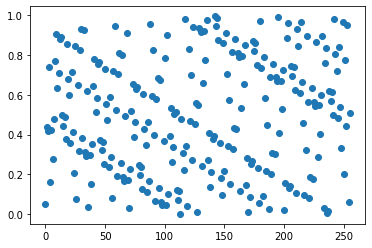

In [50]:
plt.scatter(range(len(ourLcgScaled)),ourLcgScaled)

Now we have points on the real line.  We could use a histogram to look at their distribution.  If we are hoping that our LCG, once we have scaled the results,  is imitating the Uniform$(0,1)$, what kind of shape would we want our histogram to be? 

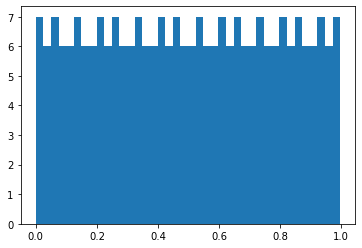

In [51]:
_=plt.hist(ourLcgScaled,bins=40)

Is this roughly what you expected?

We could repeat this for the Knuth bad LCG example:

In [ ]:
# YouTry

And show it as a histogram.  Given the pattern above, what would you expect the histogram to look like?

### Larger LCGs

The above generators are cute but not useful for simulating Lotto draws with 40 outcomes.  Minimally, we need to increase the period length with a larger modulus $m$. 

But remember that the quality of the pseudo-random numbers obtained from a LCG is extremely sensitive to the choice of $m$, $a$, and $c$.  

To illustrate that having a large $m$ alone is not enough we next look at **RANDU**, an infamous LCG which generates sequences with strong correlations between 3 consecutive points, which can been seen if we manipulate the sequence to make 3-dimensional tuples out of groups of 3 consecutive points.  

In the cell below we make our scaled sequence in one step, using a list comprehension which contains the expression to generate the LCG and the scaling.   

In [59]:
from Utils import showURL
showURL('https://en.wikipedia.org/wiki/RANDU')

In [52]:
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
RANDU = [x/m for x in linConGen(m, a, c, x0, n)]

Have a look at the results as a histogram:

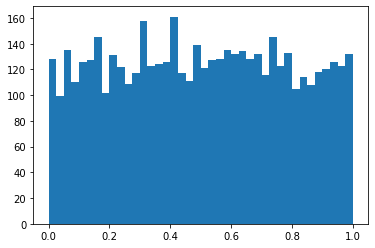

In [53]:
_=plt.hist(RANDU,bins=40)

Now we are going to use some of the array techniques we have learned about to resize the sequence from the RANDU LCG to an array with two columns

In [54]:
import numpy as np
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
randu = np.array(linConGen(m, a, c, x0, n))

In [55]:
randu.shape

(5010,)

In [56]:
randu.resize(5010//2, 2) # resize the randu array to 2 columns

In [57]:
randu.shape

(2505, 2)

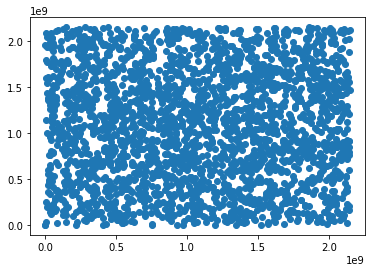

In [58]:
plt.scatter(randu[:,0],randu[:,1])

Let us resize the LCG to an array with three columns.  The effect will be that if our original sequence was $x_0, x_1, x_2, x_3, \ldots, x_{n-3}, x_{n-2}, x_{n-1}$, we will get a list of triplets, tuples of length three, $(x_0, x_1, x_2), (x_3, x_4, x_5), \ldots, (x_{n-1-2}, x_{n-1-1}, x_{n-1})$.  Unlike the pairs in 2D which seem well-scattered and random, triplets from the RANDU LCG are not very random at all! They all lie on parallel planes in 3D. 

In [59]:
import plotly.graph_objects as go
import numpy as np

randu.resize(1670, 3)

fig = go.Figure(data=[go.Scatter3d(x=randu[:,0], y=randu[:,1], z=randu[:,2],
                                   mode='markers',
                                  marker=dict(size=2))])
fig.show()

You can alter your perspective on this image using the mouse.  From a particular perspective you can see that something has gone horribly wrong ... **RANDU is a really ugly LCG**. 

The above generators are of low quality for producing pseudo-random numbers to drive statistical simulations. We end with a positive note with a LCG that is in use in the Gnu Compiler Collection. It does not have obvious problems as in small periods or as high a correlation as RANDU. 

In [60]:
#jmol error JmolInitCheck is not defined
glibCGCCLcg = np.array([x/2**32 for x in linConGen(2**32, 1103515245,12345,13,5010)])
glibCGCCLcg.resize(1670, 3) # resize the randu array to 3 columns
fig = go.Figure(data=[go.Scatter3d(x=glibCGCCLcg[:,0], y=glibCGCCLcg[:,1], z=glibCGCCLcg[:,2],
                                   mode='markers',
                                  marker=dict(size=2))])
fig.show()

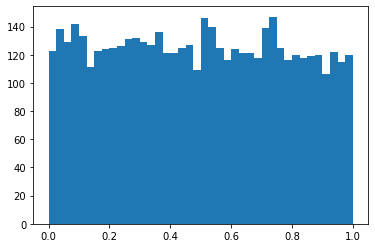

In [61]:
glibCGCCLcg = np.array([x/(2**32) for x in linConGen(2**32, 1103515245,12345,13,5010)])
_=plt.hist(glibCGCCLcg,bins=40)

**Even good LCG are not suited for realistic statistical simulation problems**. 

This is because of the strong correlation between successive numbers in the sequence. For instance, if an LCG is used to choose points in an n-dimensional space, the points will lie on, at most, $m^{1/n}$ hyper-planes. There are various statistical tests that one can use to test the quality of a pseudo-random number generator. For example, the spectral test checks if the points are not on a few hyper-planes. Of course, the Sample Mean, Sample Variance, etc. should be as expected. Let us check those quickly:

Recall that the population mean for a Uniform$(0,1)$ RV is $\frac{1}{2}$ and the population variance is $\frac{1}{12}$.

In [62]:
glibCGCCLcg.mean()  
# check that the mean is close to the population mean of 0.5 for Uniform(0,1) RV

0.49233286396638415

In [63]:
glibCGCCLcg.var()   # how about the variance

0.0824478544096861

In [64]:
1/12.0

0.08333333333333333

To go into this topic of how good a pseudo-random number generaror is and what "good" means in many different mathematical senses (in detail) is clearly beyond the scope of this course. You should just remember that using computers to generate pseudo-random numbers is not a trivial problem and use care when employing them especially in higher dimensional or less smooth problems. The mathematics behind this has one of the most beautiful roots of the subject called number theory.

### More Sophisticated Pseudo-Random Number Generators

We will use a pseudo-random number generator (PRNG) called the Mersenne Twister for simulation purposes in this course.  It is based on more sophisticated theory than that of LCG but the basic principles of recurrence relations are the same. 

(The Mersenne Twister is a variant of the recursive relation known as a twisted generalised feedback register.  See *Makato Matsumoto and Takuji Nishimura, "Mersenne Twister: A 623-dimensionally equidistributed uniform pseudo-random number generator, ACM Transactions on Modelling and Computer Simulation, vol. 8, no. 1, Jan. 1998, pp. 3-20.* if you have ACM access or via links at [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_twister).

The Mersenne Twister has a period of $2^{19937}-1 \approx 10^{6000}$ (which is essentially a Very Big Number) and is currently widely used by researchers interested in statistical simulation.  

In [73]:
showURL("https://en.wikipedia.org/wiki/Mersenne_twister",500) 
# scroll down to see the list of Software that use Mersenne Twister as the default PRNG, including SageMath

In [74]:
import random
?random

Type:        module
String form: <module 'random' from '/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/random.py'>
File:        ~/opt/anaconda3/lib/python3.9/random.py
Docstring:  
Random variable generators.

    bytes
    -----
           uniform bytes (values between 0 and 255)

    integers
    --------
           uniform within range

    sequences
    ---------
           pick random element
           pick random sample
           pick weighted random sample
           generate random permutation

    distributions on the real line:
    ------------------------------
           uniform
           triangular
           normal (Gaussian)
           lognormal
           negative exponential
           gamma
           beta
           pareto
           Weibull

    distributions on the circle (angles 0 to 2pi)
    ---------------------------------------------
           circular uniform
           von Mises

General notes on the underlying Mersenne Twister core generator:

* The

In [75]:
%%sh
## make sure the file exists, the path to the source File for you may be different, 
## copy-paste `File:` </.../pathToFile../pyrandom.py` from above output 
## `file` gives information about a file. The source file should be `ASCII text executable`
file /Users/avelin/opt/miniconda3/envs/sage_new/lib/python3.9/random.py

/Users/avelin/opt/miniconda3/envs/sage_new/lib/python3.9/random.py: cannot open `/Users/avelin/opt/miniconda3/envs/sage_new/lib/python3.9/random.py' (No such file or directory)


In [76]:
%%sh
## you can just uncomment next line to `cat` or concatenate the source file to see 
## what is really under the hoood! Power of SageMath/Python!!
# cat /Users/avelin/opt/miniconda3/envs/sage_new/lib/python3.9/random.py